In [99]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import generate_random_sales
#we import the operating system file/directory operations
import os

# Create data directory if it doesn't exist
# exist_ok=True prevents errors if the folder already exists
os.makedirs('data', exist_ok=True)

# Set style for better visualizations

# Applying the seaborn visual style to matplotlib plots
plt.style.use('seaborn-v0_8')

# "husl" provides a range of distinct, attractive colors
sns.set_palette("husl")

print("📊 Monthly Sales Analysis Project")
print("=" * 50)

📊 Monthly Sales Analysis Project


In [100]:
# Generate monthly dates for one year
# freq='MS': Frequency is "Month Start" - generates the first day of each month
dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')

# Generate sales data using our function
product_a_sales = generate_random_sales(50, 100, 12)
product_b_sales = generate_random_sales(30, 80, 12)
product_c_sales = generate_random_sales(20, 60, 12)
product_d_sales = generate_random_sales(10, 50, 12)

# Create initial DataFrame
sales_data = pd.DataFrame({
    'Date': dates,
    'Product_A': product_a_sales,
    'Product_B': product_b_sales,
    'Product_C': product_c_sales,
    'Product_D': product_d_sales
})

# Save initial dataset
# index=False prevents pandas from adding row numbers as a column
sales_data.to_csv('data/initial.csv', index=False)
print("✅ Initial dataset saved as 'data/initial.csv'")
print("\nInitial Data Preview:")
print(sales_data.head())

✅ Initial dataset saved as 'data/initial.csv'

Initial Data Preview:
        Date  Product_A  Product_B  Product_C  Product_D
0 2025-01-01         59         72         50         25
1 2025-02-01         51         36         58         41
2 2025-03-01         60         77         27         41
3 2025-04-01         78         65         42         28
4 2025-05-01         61         33         40         45


In [101]:
# Create a copy for the final DataFrame
final_df = sales_data.copy()

# Rename Date to Month for clarity
final_df = final_df.rename(columns={'Date': 'Month'})

# Assembling all the products in one row
product_columns = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

# Calculate metrics
final_df['Total_Sales'] = final_df[product_columns].sum(axis=1)
final_df['Average_Sales'] = final_df[product_columns].mean(axis=1)
final_df['Month_over_Month_Growth'] = (final_df['Total_Sales'].pct_change() * 100).round(2)

# Assign quarters
def assign_quarter(date):
    if date.month in [1, 2, 3]:
        return 'Q1'
    elif date.month in [4, 5, 6]:
        return 'Q2'
    elif date.month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

final_df['Quarter'] = final_df['Month'].apply(assign_quarter)

# Find products with max and min sales each month
final_df['Max_Sales_Product'] = final_df[product_columns].idxmax(axis=1)
final_df['Min_Sales_Product'] = final_df[product_columns].idxmin(axis=1)

# Format the Month column for better readability
final_df['Month'] = final_df['Month'].dt.strftime('%Y-%m')

# Save final dataset
final_df.to_csv('data/final.csv', index=False)
print("✅ Final dataset saved as 'data/final.csv'")

print("\nFinal DataFrame with Metrics:")
print(final_df.round(2))

✅ Final dataset saved as 'data/final.csv'

Final DataFrame with Metrics:
      Month  Product_A  Product_B  Product_C  Product_D  Total_Sales  \
0   2025-01         59         72         50         25          206   
1   2025-02         51         36         58         41          186   
2   2025-03         60         77         27         41          205   
3   2025-04         78         65         42         28          213   
4   2025-05         61         33         40         45          179   
5   2025-06         66         79         47         19          211   
6   2025-07         68         70         28         21          187   
7   2025-08         96         55         56         36          243   
8   2025-09         67         50         46         44          207   
9   2025-10         71         45         51         33          200   
10  2025-11         55         57         24         31          167   
11  2025-12         80         44         22         10        

In [102]:
# Create pivot table for average sales per quarter
pivot_avg = final_df.groupby('Quarter')[product_columns].mean().round(2)

# Create pivot table for total sales per quarter
pivot_total = final_df.groupby('Quarter')[product_columns].sum()

# Add total sales column to both pivot tables
pivot_avg['Total_Sales_Avg'] = final_df.groupby('Quarter')['Total_Sales'].mean().round(2)
pivot_total['Total_Sales'] = final_df.groupby('Quarter')['Total_Sales'].sum()

print("📈 Average Sales per Quarter:")
print(pivot_avg)
print("\n📊 Total Sales per Quarter:")
print(pivot_total)

# Save output with pivot tables
with open('data/output.csv', 'w') as f:
    f.write("MONTHLY SALES ANALYSIS REPORT\n")
    f.write("=" * 50 + "\n\n")
    f.write("FINAL DATASET WITH METRICS:\n")
    final_df.to_csv(f, index=False)
    f.write("\n\n" + "=" * 50 + "\n\n")
    f.write("AVERAGE SALES PER QUARTER:\n")
    pivot_avg.to_csv(f)
    f.write("\n\nTOTAL SALES PER QUARTER:\n")
    pivot_total.to_csv(f)

print("✅ Output file saved as 'data/output.csv'")

📈 Average Sales per Quarter:
         Product_A  Product_B  Product_C  Product_D  Total_Sales_Avg
Quarter                                                             
Q1           56.67      61.67      45.00      35.67           199.00
Q2           68.33      59.00      43.00      30.67           201.00
Q3           77.00      58.33      43.33      33.67           212.33
Q4           68.67      48.67      32.33      24.67           174.33

📊 Total Sales per Quarter:
         Product_A  Product_B  Product_C  Product_D  Total_Sales
Quarter                                                         
Q1             170        185        135        107          597
Q2             205        177        129         92          603
Q3             231        175        130        101          637
Q4             206        146         97         74          523
✅ Output file saved as 'data/output.csv'


In [ ]:
print("🔍 KEY INSIGHTS")
print("=" * 40)

# Best month (highest total sales)
best_month = final_df.loc[final_df['Total_Sales'].idxmax()]
print(f"🏆 Best Month: {best_month['Month']}")
print(f"   Total Sales: {best_month['Total_Sales']}")
print(f"   Growth: {best_month['Month_over_Month_Growth']}%")

# Best product (highest cumulative annual sales)
annual_totals = final_df[product_columns].sum()
best_product = annual_totals.idxmax()
print(f"\n🏆 Best Product: {best_product}")
print(f"   Annual Sales: {annual_totals[best_product]}")

# Best quarter (highest total sales)
best_quarter = pivot_total['Total_Sales'].idxmax()
print(f"\n🏆 Best Quarter: {best_quarter}")
print(f"   Quarter Sales: {pivot_total['Total_Sales'].max()}")

print("\n📊 Annual Sales Summary:")
for product in product_columns:
    print(f"   {product}: {annual_totals[product]} units")
print(f"   GRAND TOTAL: {annual_totals.sum()} units")

🔍 KEY INSIGHTS
🏆 Best Month: 2025-08
   Total Sales: 243
   Growth: 29.95%

🏆 Best Product: Product_A
   Annual Sales: 812

🏆 Best Quarter: Q3
   Quarter Sales: 637

📊 Annual Sales Summary:
   Product_A: 812 units
   Product_B: 683 units
   Product_C: 491 units
   Product_D: 374 units
   GRAND TOTAL: 2360 units



🎨 CREATING VISUALIZATIONS...


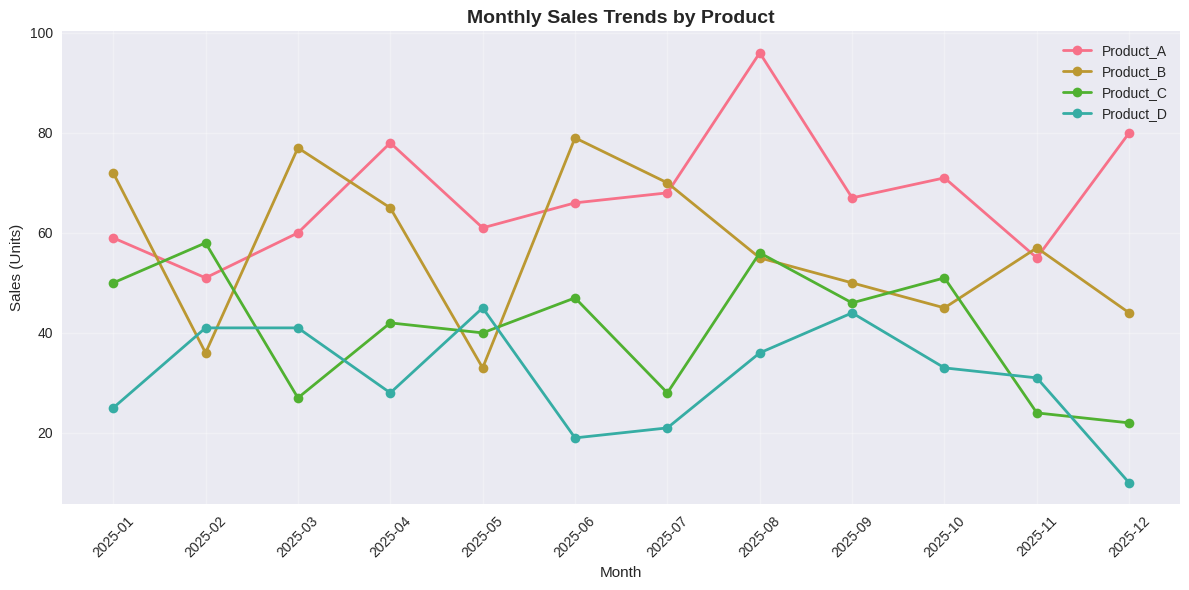

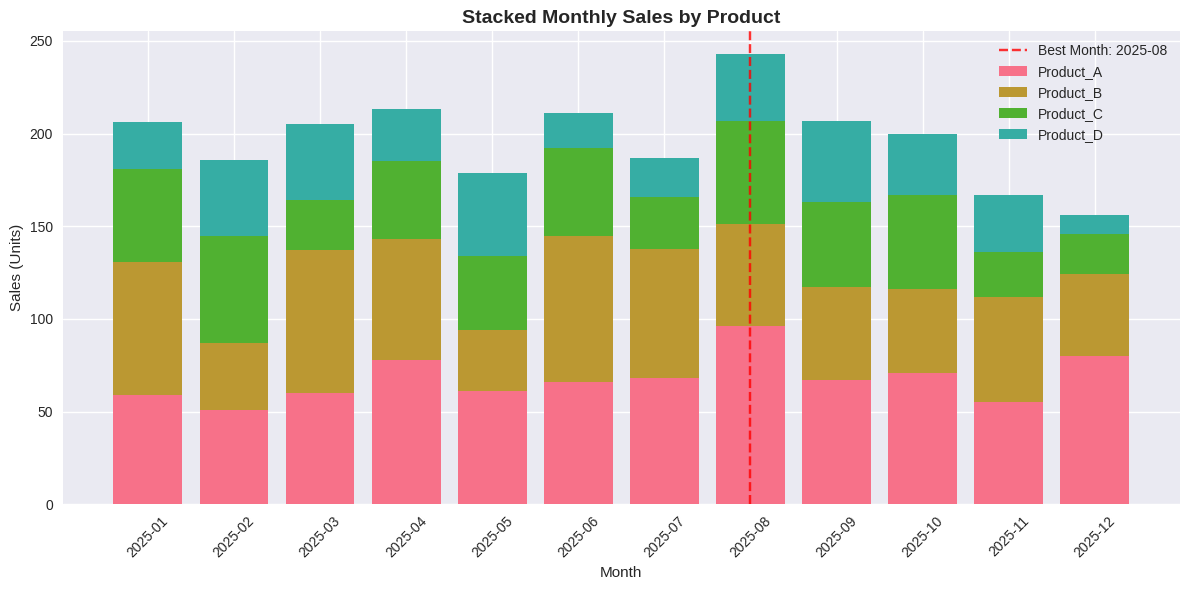

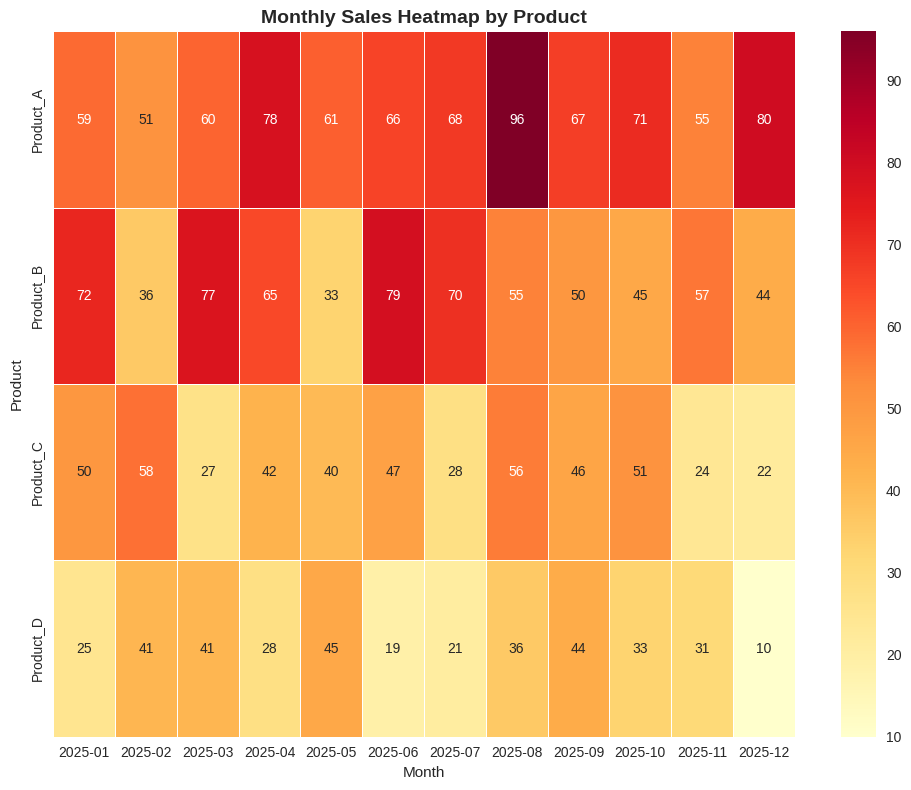

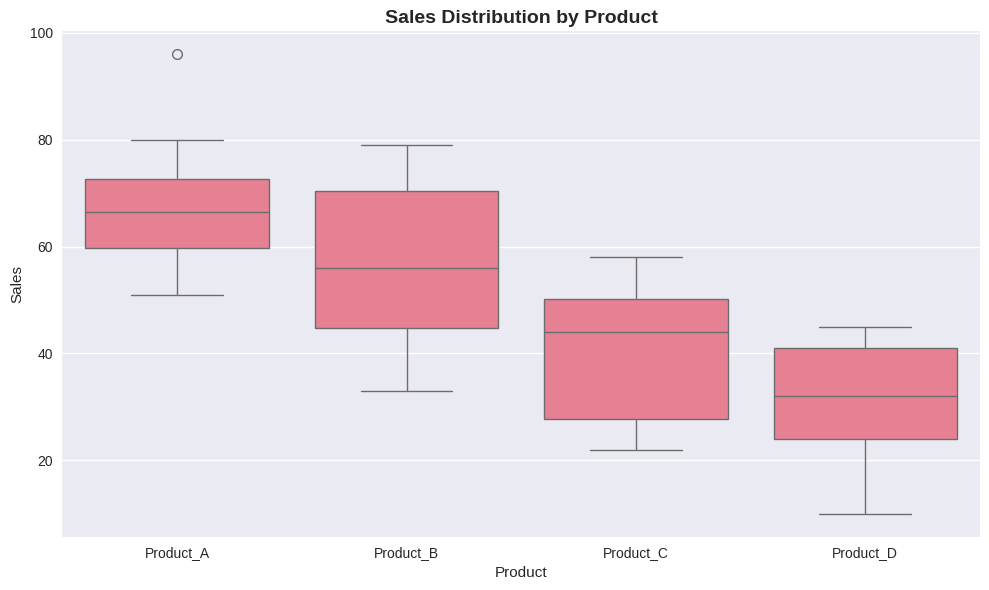

✅ All visualizations completed!


In [104]:
# Create visualization section
print("\n🎨 CREATING VISUALIZATIONS...")

# 1. Line chart for each product across months
plt.figure(figsize=(12, 6))
for product in product_columns:
    plt.plot(final_df['Month'], final_df[product], marker='o', label=product, linewidth=2)

plt.title('Monthly Sales Trends by Product', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales (Units)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Stacked bar chart of total monthly sales by product
plt.figure(figsize=(12, 6))
bottom_values = np.zeros(len(final_df))

for product in product_columns:
    plt.bar(final_df['Month'], final_df[product], label=product, bottom=bottom_values)
    bottom_values += final_df[product].values

# Annotate best month
best_month_idx = final_df['Total_Sales'].idxmax()
plt.axvline(x=best_month_idx, color='red', linestyle='--', alpha=0.8, label=f'Best Month: {final_df.iloc[best_month_idx]["Month"]}')

plt.title('Stacked Monthly Sales by Product', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales (Units)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Seaborn heatmap: monthly sales of each product
plt.figure(figsize=(10, 8))
heatmap_data = final_df[product_columns].T
heatmap_data.columns = final_df['Month']

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Monthly Sales Heatmap by Product', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# 4. Seaborn boxplot: distribution of sales per product
plt.figure(figsize=(10, 6))
melted_data = final_df[product_columns].melt(var_name='Product', value_name='Sales')
sns.boxplot(data=melted_data, x='Product', y='Sales')
plt.title('Sales Distribution by Product', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ All visualizations completed!")

In [105]:
print("\n🤔 CONCLUSION QUESTIONS")
print("=" * 40)

# Question 1: Which product contributes the most to overall sales?
total_sales = annual_totals.sum()
contributions = (annual_totals / total_sales * 100).round(1)

print("1. Which product contributes the most to overall sales throughout the year?")
print(f"   Answer: {best_product} contributes the most with {contributions[best_product]}% of total sales")
print("   Contribution breakdown:")
for product in product_columns:
    print(f"   - {product}: {contributions[product]}%")

# Question 2: Which quarter performs best and why might that be?
print(f"\n2. Which quarter performs best and why might that be?")
print(f"   Answer: {best_quarter} performs best with {quarter_totals[best_quarter]} total sales")
print("   Potential reasons:")
if best_quarter == 'Q4':
    print("   - Holiday season (October-December) typically drives higher sales")
elif best_quarter == 'Q1':
    print("   - New year initiatives and post-holiday promotions")
elif best_quarter == 'Q2':
    print("   - Spring season and mid-year shopping periods")
else:
    print("   - Summer season and back-to-school preparations")

# Question 3: How could this information be used to improve sales strategy?
print(f"\n3. How could this information be used to improve sales strategy for the next year?")
print("   Strategic recommendations:")
print("   - Allocate more marketing budget to the best-performing quarter")
print(f"   - Focus inventory planning on {best_product} which shows strongest demand")
print(f"   - Analyze why {final_df['Min_Sales_Product'].mode()[0]} consistently underperforms")
print("   - Use monthly growth patterns to anticipate demand fluctuations")
print("   - Develop targeted promotions for weaker months based on successful months' strategies")

print("\n" + "=" * 50)
print("🎯 PROJECT COMPLETED SUCCESSFULLY!")
print("Files generated:")
print("  ✅ data/initial.csv - Raw generated dataset")
print("  ✅ data/final.csv - DataFrame with calculated metrics") 
print("  ✅ data/output.csv - Final results including pivot tables")


🤔 CONCLUSION QUESTIONS
1. Which product contributes the most to overall sales throughout the year?
   Answer: Product_A contributes the most with 34.4% of total sales
   Contribution breakdown:
   - Product_A: 34.4%
   - Product_B: 28.9%
   - Product_C: 20.8%
   - Product_D: 15.8%

2. Which quarter performs best and why might that be?
   Answer: Q3 performs best with 565 total sales
   Potential reasons:
   - Summer season and back-to-school preparations

3. How could this information be used to improve sales strategy for the next year?
   Strategic recommendations:
   - Allocate more marketing budget to the best-performing quarter
   - Focus inventory planning on Product_A which shows strongest demand
   - Analyze why Product_D consistently underperforms
   - Use monthly growth patterns to anticipate demand fluctuations
   - Develop targeted promotions for weaker months based on successful months' strategies

🎯 PROJECT COMPLETED SUCCESSFULLY!
Files generated:
  ✅ data/initial.csv - R